#Libraries
---

In [21]:
# Importa a biblioteca pandas, usada para manipulação e análise de dados estruturados (DataFrames e Series)
import pandas as pd

# Importa a biblioteca Matplotlib, usada para criação de gráficos estáticos, como linhas, barras e dispersão
import matplotlib.pyplot as plt

# Importa a biblioteca Seaborn, que facilita a criação de gráficos estatísticos com uma interface de alto nível e visual mais atraente
import seaborn as sns

#Extract
---

In [22]:
# Define a URL de um arquivo JSON hospedado no GitHub, que contém os dados usados no projeto
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [23]:
# Lê o conteúdo do arquivo JSON diretamente da URL e carrega os dados em um DataFrame do pandas
df = pd.read_json(url)

# Exibe as primeiras 5 linhas do DataFrame para uma visualização inicial dos dados
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#Transform
---

Pré-processamento dos dados JSON

Neste passo, realizamos a normalização de estruturas aninhadas presentes no JSON original utilizando pd.json_normalize, o que garante que todas as informações sejam transformadas em colunas planas do DataFrame. Essa etapa é essencial para facilitar a análise e o acesso aos dados posteriormente.

Além disso, padronizamos os nomes das colunas: removemos a notação com ponto (.), substituindo por underscore (_), e transformamos todos os nomes para letras minúsculas. Essa convenção melhora a legibilidade e evita problemas ao acessar colunas via atributos (df.nome_coluna) ou ao integrá-las com outras ferramentas e bibliotecas.

In [24]:
# Converte o DataFrame original em uma lista de dicionários e normaliza os dados para "achatar" estruturas aninhadas (como dicionários dentro de colunas)
df = pd.json_normalize(df.to_dict('records'))

# Renomeia as colunas: substitui pontos por underscores (caso existam subníveis no JSON) e converte os nomes para letras minúsculas para padronização
df.columns = [col.replace('.', '_').lower() for col in df.columns]

# Exibe as primeiras 5 linhas do DataFrame transformado para verificar o resultado da normalização
df.head()

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [25]:
# Exibe informações gerais sobre o DataFrame, como número de entradas, colunas, tipos de dados e quantidade de valores não nulos por coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

Tratamento da coluna account_charges_total

A coluna account_charges_total foi inicialmente carregada como object, indicando a presença de dados mal formatados (como strings vazias ou não numéricas). Utilizamos pd.to_numeric com errors='coerce' para converter os valores válidos em float e transformar os inválidos em NaN. Em seguida, substituímos os NaN por 0, assumindo que a ausência de valor indica que o cliente não possui cobranças acumuladas. Essa etapa é importante para garantir que a coluna possa ser utilizada corretamente em análises quantitativas e modelagem.

In [26]:
# Converte a coluna 'account_charges_total' para tipo numérico (float), forçando erros (valores inválidos) a serem transformados em NaN
df['account_charges_total'] = pd.to_numeric(df['account_charges_total'], errors='coerce')

# Substitui os valores NaN (resultantes da conversão) por 0, assumindo que valores ausentes representam ausência de cobrança total
df['account_charges_total'] = df['account_charges_total'].fillna(0)

Padronização e binarização de variáveis categóricas

Neste trecho, realizamos o pré-processamento de variáveis categóricas binárias com o objetivo de preparar os dados para análises estatísticas e modelagem preditiva. Inicialmente, substituímos valores como 'No phone service' e 'No internet service' por 'No' para manter a consistência nas respostas binárias. Também tratamos strings vazias como ausência de serviço.

Em seguida, convertamos colunas com respostas 'Yes'/'No' para valores numéricos 1 e 0, respectivamente. Essa binarização é fundamental para o uso em algoritmos de machine learning, que operam sobre dados numéricos. O mesmo processo foi aplicado à variável de gênero, transformando 'Male' e 'Female' em 0 e 1. Essa conversão permite interpretar as variáveis de forma quantitativa, mantendo a semântica original.

In [27]:
# Substitui valores específicos em todo o DataFrame para uniformizar os dados binários:
# 'No phone service' e 'No internet service' são tratados como 'No', e strings vazias são também substituídas por 'No'
df.replace({'No phone service': 'No', 'No internet service': 'No', '': 'No'}, inplace=True)

# Define a lista de colunas categóricas com valores binários ('Yes'/'No') que serão convertidas para 0 e 1
colunas_binarias = ['churn', 'customer_partner', 'customer_dependents', 'phone_phoneservice', 'phone_multiplelines',
                   'internet_onlinesecurity', 'internet_onlinebackup', 'internet_deviceprotection',
                   'internet_techsupport', 'internet_streamingtv', 'internet_streamingmovies',
                   'account_paperlessbilling']

# Converte os valores dessas colunas de 'Yes'/'No' para 1/0 e transforma os tipos para inteiros
for col in colunas_binarias:
    df[col] = df[col].replace({'No': '0', 'Yes': '1'}).astype(int)

# Converte a variável de gênero de 'Male'/'Female' para 0/1 e transforma para tipo inteiro
df['customer_gender'] = df['customer_gender'].replace({'Male': '0', 'Female': '1'}).astype(int)

Cálculo da média diária de cobrança mensal

Este passo cria uma nova variável, daily_account, que estima o valor médio cobrado por dia ao dividir a cobrança mensal (account_charges_monthly) pelo número médio de dias em um mês (30). Essa métrica pode ser útil para análises mais detalhadas de comportamento de consumo, permitindo comparar valores proporcionais ao tempo e facilitar interpretações quando as durações de contratos ou períodos de análise variam.

In [28]:
# Cria uma nova coluna 'daily_account' que representa a média diária de cobrança mensal, dividindo o valor mensal por 30 (aproximadamente o número de dias em um mês)
df['daily_account'] = (df['account_charges_monthly'] / 30)

Verificação final da estrutura e conteúdo do DataFrame

Após as etapas de pré-processamento, transformação e criação de novas variáveis, utilizamos df.info() para revisar a estrutura atual do DataFrame, verificar os tipos de dados e garantir que não há valores ausentes inesperados. Em seguida, com df.head(), visualizamos as primeiras linhas para confirmar que as alterações foram aplicadas corretamente e para entender melhor o formato final dos dados antes das análises ou modelagens subsequentes.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7267 non-null   int64  
 2   customer_gender            7267 non-null   int64  
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   int64  
 5   customer_dependents        7267 non-null   int64  
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   int64  
 8   phone_multiplelines        7267 non-null   int64  
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   int64  
 11  internet_onlinebackup      7267 non-null   int64  
 12  internet_deviceprotection  7267 non-null   int64  
 13  internet_techsupport       7267 non-null   int64

In [30]:
df.head()

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,daily_account
0,0002-ORFBO,0,1,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,0,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,0,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,0,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,1,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


Codificação de Variáveis Categóricas com One-Hot Encoding

Para que algoritmos de machine learning possam interpretar variáveis categóricas, especialmente aquelas com múltiplas categorias nominais (como internet_internetservice, account_contract e account_paymentmethod), é necessário transformá-las em um formato numérico.

Uma abordagem comum para isso é a aplicação do One-Hot Encoding, utilizando a função pd.get_dummies. Esse método converte cada categoria em uma nova coluna binária, que recebe valor 1 quando a observação pertence àquela categoria, e 0 caso contrário.

No código abaixo, utilizamos o parâmetro drop_first=True para eliminar a primeira categoria de cada variável. Essa prática ajuda a evitar multicolinearidade, tornando o conjunto de dados mais adequado para algoritmos baseados em regressão e outras técnicas sensíveis à redundância entre variáveis.

Esse processo é essencial na etapa de preparação dos dados, garantindo que variáveis qualitativas sejam interpretáveis por modelos preditivos.

In [31]:
# Criar uma cópia para não alterar o DataFrame original da EDA
df_model = df.copy()

# Colunas a serem transformadas
colunas_categoricas = ['internet_internetservice', 'account_contract', 'account_paymentmethod']

# Aplicar o One-Hot Encoding
df_model = pd.get_dummies(df_model, columns=colunas_categoricas, drop_first=True)

# Exibir as primeiras linhas para ver o resultado
df_model.head()

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_onlinesecurity,...,account_charges_monthly,account_charges_total,daily_account,internet_internetservice_Fiber optic,internet_internetservice_No,account_contract_One year,account_contract_Two year,account_paymentmethod_Credit card (automatic),account_paymentmethod_Electronic check,account_paymentmethod_Mailed check
0,0002-ORFBO,0,1,0,1,1,9,1,0,0,...,65.6,593.30,2.186667,False,False,True,False,False,False,True
1,0003-MKNFE,0,0,0,0,0,9,1,1,0,...,59.9,542.40,1.996667,False,False,False,False,False,False,True
2,0004-TLHLJ,1,0,0,0,0,4,1,0,0,...,73.9,280.85,2.463333,True,False,False,False,False,True,False
3,0011-IGKFF,1,0,1,1,0,13,1,0,0,...,98.0,1237.85,3.266667,True,False,False,False,False,True,False
4,0013-EXCHZ,1,1,1,1,0,3,1,0,0,...,83.9,267.40,2.796667,True,False,False,False,False,False,True


#Load & Analysis
---

## Análise exploratória Inicial

Nesta etapa, iniciamos a análise exploratória utilizando o método describe() para obter uma visão geral das variáveis do conjunto de dados. A versão padrão retornou estatísticas descritivas para variáveis numéricas e binarizadas (após transformação), como média, desvio padrão, valores mínimos e máximos, e quartis.

Essa análise revelou, por exemplo, que a média de churn é aproximadamente 0.26, sugerindo que cerca de 26% dos clientes cancelaram o serviço. Variáveis como customer_tenure, account_charges_monthly e account_charges_total mostraram ampla variação, o que pode indicar perfis diversos de clientes.

Na sequência, describe(include=object) foi utilizado para inspecionar variáveis categóricas originais, como internet_internetservice, account_contract e account_paymentmethod. Essa análise nos mostrou a distribuição de categorias, por exemplo, que o contrato Month-to-month é o mais frequente, e que a forma de pagamento mais comum é Electronic check. Essas informações ajudam a identificar padrões e possíveis fatores relacionados ao churn.

Essas estatísticas são fundamentais para entender a composição da base, direcionar o tratamento de dados e orientar análises mais profundas.

In [32]:
# Gera estatísticas descritivas das colunas numéricas e binarizadas (média, desvio padrão, quartis, etc.)
df.describe()

,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_paperlessbilling,account_charges_monthly,account_charges_total,daily_account
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.494289,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035,2.157337
std,0.437115,0.500002,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.343333
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [33]:
# Gera estatísticas descritivas das colunas categóricas (contagem, número de valores únicos, valor mais comum e sua frequência)
df.describe(include=object)

,customerid,internet_internetservice,account_contract,account_paymentmethod
count,7267,7267,7267,7267
unique,7267,3,3,4
top,9995-HOTOH,Fiber optic,Month-to-month,Electronic check
freq,1,3198,4005,2445


##Distribuição de Churn de Clientes

Este gráfico de pizza representa a proporção de clientes que cancelaram (churn = 1) e que não cancelaram (churn = 0) os serviços da empresa. Utilizamos a contagem dos valores e aplicamos uma visualização intuitiva e proporcional, com cores distintas para facilitar a interpretação.

Essa visualização é útil para entender rapidamente o desequilíbrio na variável-alvo — que, neste caso, mostra que a maior parte dos clientes não cancelou, enquanto uma fração menor optou pelo cancelamento. Esse desequilíbrio deve ser levado em consideração nas etapas de modelagem, pois pode afetar o desempenho de algoritmos preditivos.

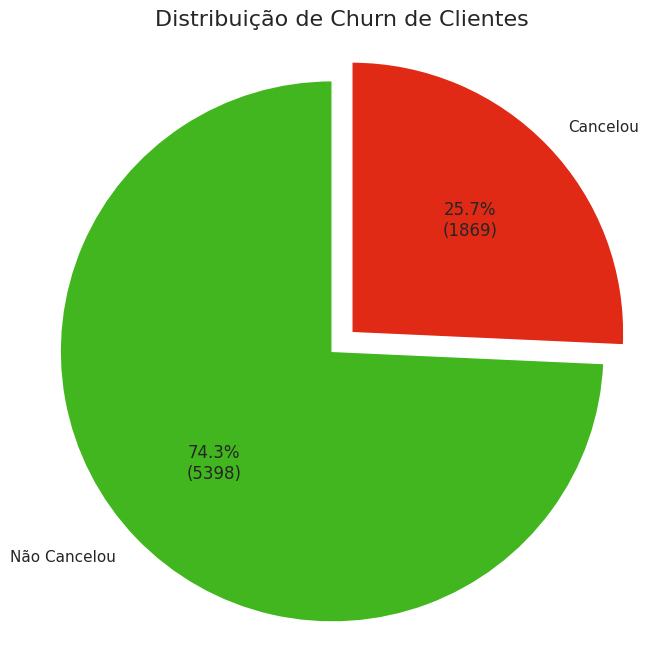

In [34]:
# Ordena os valores de churn explicitamente (0: Não Cancelou, 1: Cancelou)
churn_counts = df['churn'].value_counts().sort_index()

# Função para exibir percentuais + valores absolutos no gráfico
def autopct_format(pct, allvals):
    absolute = int(round(pct / 100. * sum(allvals)))
    return f'{pct:.1f}%\n({absolute})'

# Criação do gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(
    churn_counts,
    labels= ['Não Cancelou', 'Cancelou'],
    autopct=lambda pct: autopct_format(pct, churn_counts),
    startangle=90,
    colors= ['#42B61E', '#E02A15'],
    explode= (0, 0.1) # Destaque na fatia de quem cancelou
)
plt.title('Distribuição de Churn de Clientes', fontsize=16)
plt.axis('equal')  # Garante formato circular
plt.show()

##Análise da Taxa de Churn por Variável Categórica

Nesta etapa, foi realizada uma análise exploratória das variáveis categóricas em relação à taxa de churn. Para isso, criamos uma cópia do DataFrame original
e mapeamos variáveis binárias codificadas como 0/1 para rótulos mais legíveis (como "Sim"/"Não" ou "Masculino"/"Feminino").

Em seguida, foram gerados gráficos de barras para cada variável categórica, mostrando a proporção de clientes que cancelaram o serviço em cada categoria. Essa visualização é essencial para identificar padrões e variáveis com maior impacto no churn, facilitando decisões futuras de modelagem e estratégia.



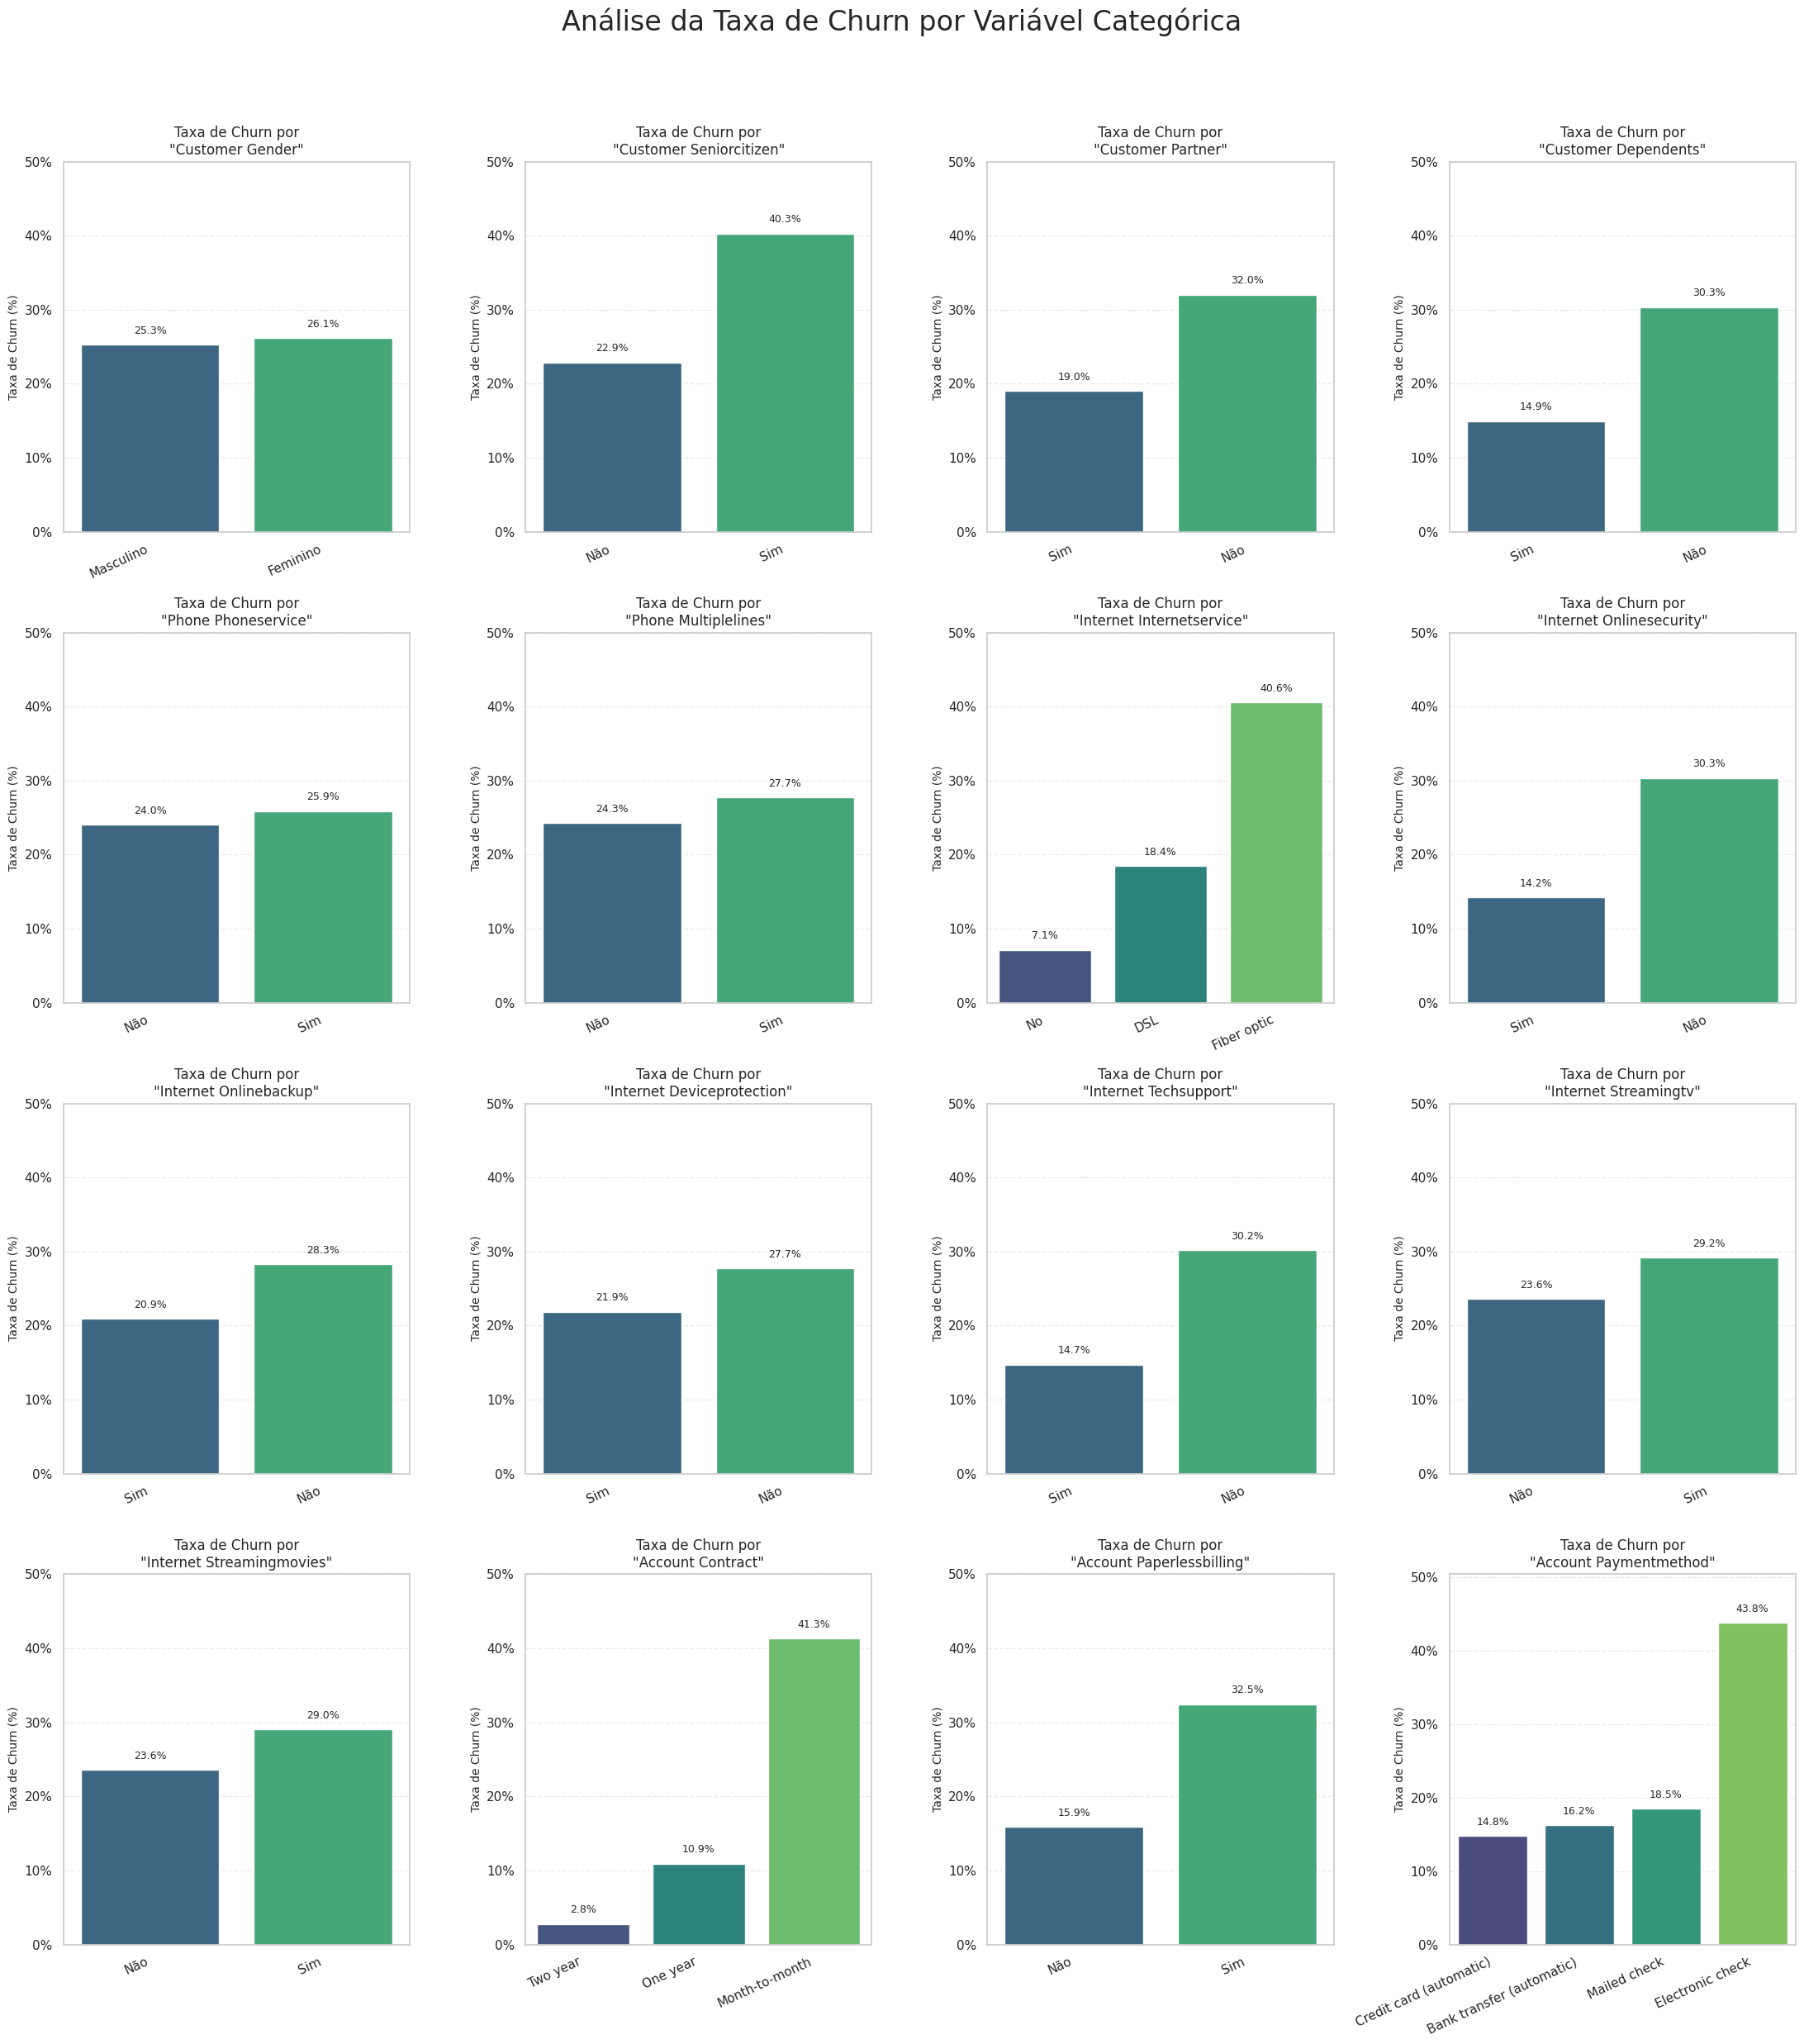

In [35]:
# Cópia do DataFrame original para manter os dados de análise separados
df_copy = df.copy()

# Mapeia variáveis binárias de 0/1 para rótulos legíveis
mapeamento_para_plot = {
    'customer_gender': {0: 'Masculino', 1: 'Feminino'},
    'customer_seniorcitizen': {0: 'Não', 1: 'Sim'},
    'customer_partner': {0: 'Não', 1: 'Sim'},
    'customer_dependents': {0: 'Não', 1: 'Sim'},
    'phone_phoneservice': {0: 'Não', 1: 'Sim'},
    'account_paperlessbilling': {0: 'Não', 1: 'Sim'},
    'phone_multiplelines': {0: 'Não', 1: 'Sim'},
    'internet_onlinesecurity': {0: 'Não', 1: 'Sim'},
    'internet_onlinebackup': {0: 'Não', 1: 'Sim'},
    'internet_deviceprotection': {0: 'Não', 1: 'Sim'},
    'internet_techsupport': {0: 'Não', 1: 'Sim'},
    'internet_streamingtv': {0: 'Não', 1: 'Sim'},
    'internet_streamingmovies': {0: 'Não', 1: 'Sim'},
}

# Aplica mapeamento
for col, mapping in mapeamento_para_plot.items():
    df_copy[col] = df_copy[col].map(mapping)

# Lista de variáveis categóricas para análise
all_categorical_cols = [
    'customer_gender', 'customer_seniorcitizen', 'customer_partner', 'customer_dependents',
    'phone_phoneservice', 'phone_multiplelines', 'internet_internetservice',
    'internet_onlinesecurity', 'internet_onlinebackup', 'internet_deviceprotection',
    'internet_techsupport', 'internet_streamingtv', 'internet_streamingmovies',
    'account_contract', 'account_paperlessbilling', 'account_paymentmethod'
]

# Cria uma grade de subplots
fig, axes = plt.subplots(4, 4, figsize=(22, 24))
axes = axes.flatten()

for i, col in enumerate(all_categorical_cols):
    churn_rate = df_copy.groupby(col)['churn'].mean().sort_values()

    sns.barplot(
        x=churn_rate.index,
        y=churn_rate.values,
        hue=churn_rate.index,
        palette="viridis",
        ax=axes[i],
        legend=False
    )

    axes[i].set_title(f'Taxa de Churn por\n"{col.replace("_", " ").title()}"', fontsize=12)
    axes[i].set_ylabel('Taxa de Churn (%)', fontsize=10)
    axes[i].set_xlabel('', fontsize=10)
    axes[i].set_ylim(0, max(0.5, max(churn_rate.values) * 1.15))
    axes[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
    axes[i].grid(axis='y', linestyle='--', alpha=0.4)

    # Rotaciona rótulos do eixo x e insere anotações nas barras
    for label in axes[i].get_xticklabels():
        label.set_rotation(25)
        label.set_ha('right')

    # Adiciona o valor de churn no topo de cada barra
    for j, value in enumerate(churn_rate.values):
        axes[i].text(j, value + 0.015, f'{value:.1%}', ha='center', fontsize=9)

# Remove os subplots não utilizados, se existirem
for i in range(len(all_categorical_cols), len(axes)):
    fig.delaxes(axes[i])

# Título geral e ajustes de layout
fig.suptitle('Análise da Taxa de Churn por Variável Categórica', fontsize=24, y=1.03)
plt.tight_layout()
plt.show()

##Análise da Distribuição das Variáveis Numéricas por Status de Churn

Nesta visualização, exploramos como as variáveis numéricas selecionadas se distribuem para clientes que **cancelaram** o serviço (Churn = 1) e para aqueles que **não cancelaram** (Churn = 0).

Utilizamos gráficos de densidade kernel (KDE) para comparar as distribuições das seguintes variáveis:

- Tempo de permanência do cliente (`customer_tenure`)
- Valor mensal cobrado na conta (`account_charges_monthly`)
- Valor total cobrado na conta (`account_charges_total`)
- Valor médio diário cobrado (`daily_account`)

Cada gráfico mostra as curvas de densidade para os dois grupos, permitindo identificar diferenças nos padrões de cobrança e tempo de permanência entre clientes que cancelaram e que permaneceram.

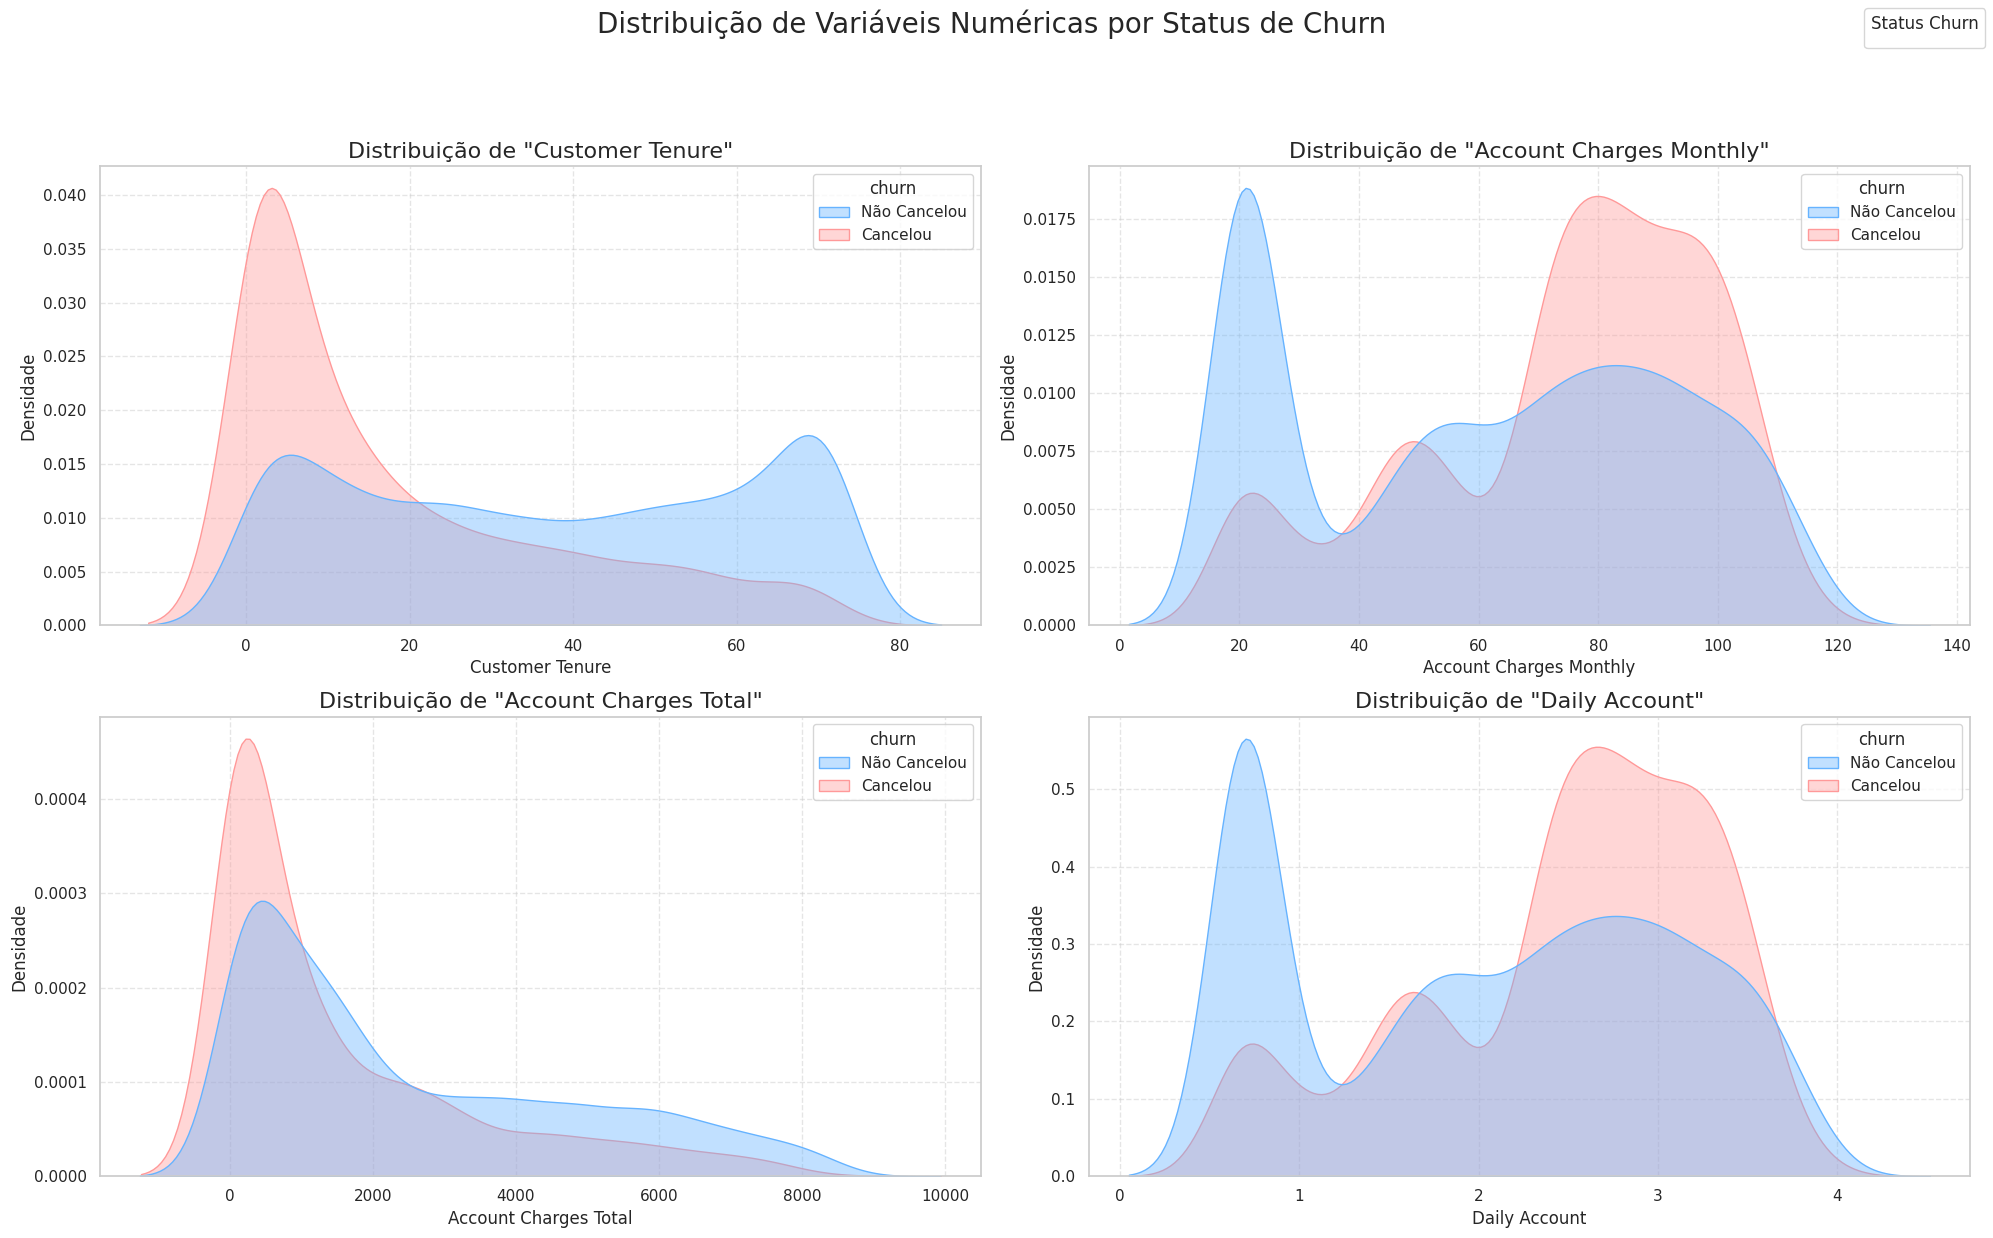

In [36]:
# Cria uma cópia do DataFrame para manter os dados originais intactos
df_copy = df.copy()

# Mapeia a coluna 'churn' para rótulos legíveis ('Não Cancelou' e 'Cancelou')
df_copy['churn'] = df_copy['churn'].map({0: 'Não Cancelou', 1: 'Cancelou'})

# Define as colunas numéricas que serão analisadas
numerical_cols = ['customer_tenure', 'account_charges_monthly', 'account_charges_total', 'daily_account']

# Cria uma figura com 2 linhas e 2 colunas para os subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = axes.flatten()  # Facilita o acesso sequencial aos eixos

# Define o título geral da figura
fig.suptitle('Distribuição de Variáveis Numéricas por Status de Churn', fontsize=20, y=1.03)

# Define a paleta de cores para os dois grupos de churn
colors = ['#66b3ff', '#ff9999']

# Loop para criar um gráfico KDE para cada variável numérica
for i, col in enumerate(numerical_cols):
    ax = axes[i]

    # Plot KDE para as distribuições por grupo de churn, preenchido e com transparência
    sns.kdeplot(
        data=df_copy, x=col, hue='churn', fill=True, common_norm=False,
        palette=colors, alpha=0.4, ax=ax
    )

    # Configurações dos títulos e rótulos dos eixos
    ax.set_title(f'Distribuição de "{col.replace("_", " ").title()}"', fontsize=16)
    ax.set_xlabel(col.replace("_", " ").title(), fontsize=12)
    ax.set_ylabel('Densidade', fontsize=12)

    # Adiciona grid com linhas tracejadas e baixa opacidade para melhor leitura
    ax.grid(True, linestyle='--', alpha=0.5)

# Ajusta o layout para evitar sobreposição e coloca o título geral
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Extrai handles e labels da legenda para posicioná-la fora dos subplots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title='Status Churn', loc='upper right', fontsize=12)

# Exibe a figura
plt.show()

## Correlação entre Variáveis e Churn

Nesta análise, utilizamos um gráfico de barras para verificar a força e direção das relações lineares entre as variáveis numéricas e a variável alvo `churn`.

A correlação é medida pelo coeficiente de correlação de Pearson, variando de -1 a 1:

- **Valores próximos de 1** indicam correlação positiva forte;
- **Valores próximos de -1** indicam correlação negativa forte;
- **Valores próximos de 0** indicam fraca ou nenhuma correlação linear.

O objetivo é identificar quais variáveis possuem maior potencial preditivo em relação ao cancelamento do cliente.


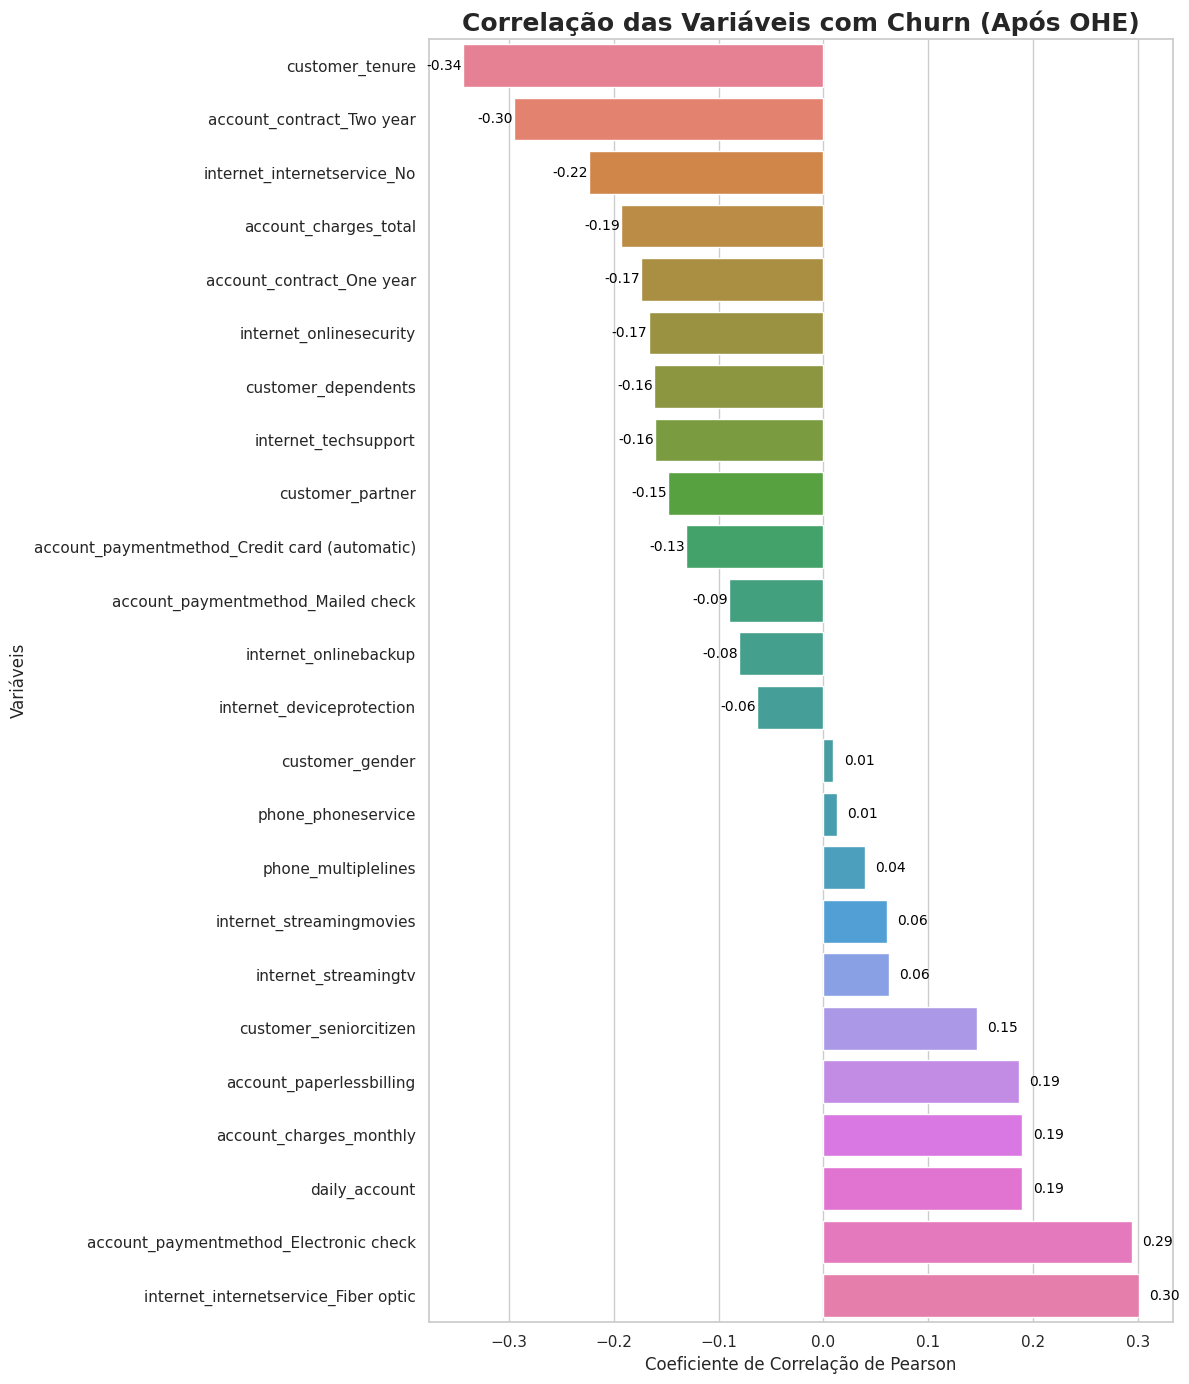

In [37]:
# Calcular correlação com churn (exceto ele mesmo)
df_numeric = df_model.drop('customerid', axis=1)
corr_churn = df_numeric.corr()['churn'].drop('churn').sort_values()

# Gerar paleta com o número exato de variáveis
num_vars = len(corr_churn)
palette = sns.color_palette("coolwarm", num_vars)  # Ou qualquer outra com gradiente claro

# Criar o gráfico
plt.figure(figsize=(12, 14))
sns.set(style="whitegrid")

ax = sns.barplot(
    x=corr_churn.values,
    y=corr_churn.index,
    hue=corr_churn.index,
    legend=False
)

# Anotações e estilo
plt.title('Correlação das Variáveis com Churn (Após OHE)', fontsize=18, weight='bold')
plt.xlabel('Coeficiente de Correlação de Pearson', fontsize=12)
plt.ylabel('Variáveis', fontsize=12)

# Exibir valores numéricos ao lado das barras
for i, v in enumerate(corr_churn.values):
    ax.text(v + 0.01 if v > 0 else v - 0.035, i, f"{v:.2f}", color='black', va='center', fontweight='light', fontsize=10)

plt.tight_layout()
plt.show()

# **Relatório de Análise de Churn de Clientes – Telecom X**

---

### **Objetivo da Análise**
Analisar os dados dos clientes da Telecom X para identificar os principais fatores que contribuem para o "churn" (cancelamento de serviço) e gerar insights que possam guiar futuras estratégias de retenção.

---

## 1. Extração, Transformação e Carga (ETL)
O processo inicial consistiu em preparar os dados brutos para a análise, seguindo as seguintes etapas:

* **Extração e Carga:** Os dados foram extraídos de uma fonte JSON online. A estrutura inicial continha colunas aninhadas que foram carregadas em um DataFrame do Pandas.

* **Transformação e Limpeza:**
    * **Achatamento (JSON Normalize):** A função `pd.json_normalize` foi utilizada para converter as colunas aninhadas em um formato tabular plano.
    * **Padronização de Nomes:** Nomes de colunas foram convertidos para minúsculas e com `_` para facilitar a manipulação.
    * **Tratamento de Tipos de Dados:** A coluna `account_charges_total` foi convertida para numérica, e os valores vazios foram transformados em `NaN`.
    * **Tratamento de Dados Faltantes:** Os `NaN` em `account_charges_total` (de clientes com `tenure` = 0) foram preenchidos com `0`.
    * **Padronização de Categóricos:** Valores como "No phone service" foram consolidados para "No".
    * **Codificação Binária:** Colunas "Yes"/"No" foram convertidas para `1` e `0`.

* **Engenharia de Features:** Para enriquecer a análise, foram criadas as features `daily_account` (custo diário).

---

## 2. Análise Exploratória de Dados (EDA)
A análise revelou os seguintes padrões:

* **Taxa Geral de Churn:** A taxa geral de churn na base de clientes é de **25,7%**.

* **Fatores Categóricos:**
    * **Tipo de Contrato:** Clientes com contrato **Mês a Mês** têm a maior taxa de churn (41,3%).
    * **Método de Pagamento:** **Cheque Eletrônico** está associado à maior taxa de cancelamento (43,8%).
    * **Serviços Adicionais:** A ausência de serviços como **Suporte Técnico** e **Segurança Online** aumenta a chance de churn.

* **Fatores Numéricos:**
    * **Tempo de Contrato (Tenure):** Clientes que cancelam estão concentrados nos **primeiros meses de contrato**.
    * **Cobrança Mensal:** Clientes que cancelam tendem a ter uma **cobrança mensal mais alta**.

---

## 3. Análise de Correlação
Após a codificação One-Hot Encoding, a análise de correlação quantificou as relações:

* **Correlações Positivas (Aumentam o Churn):** Contrato Mês a Mês, Internet de Fibra Ótica.
* **Correlações Negativas (Diminuem o Churn):** Tempo de Contrato, Contrato de 2 Anos.

---

## 4. Conclusão e Recomendações
### **Conclusões Principais:**
1.  **Vulnerabilidade Contratual:** A ausência de um vínculo de longo prazo é o principal fator de risco.
2.  **Atrito no Pagamento e Preço:** O Cheque Eletrônico e o custo da Fibra Ótica são pontos de atrito.
3.  **Lealdade é Chave:** Clientes antigos e com mais serviços de suporte são mais leais.

### **Recomendações Estratégicas:**
* **Para o Negócio:**
    * Incentivar a migração de clientes do plano "Mês a Mês" para contratos de longo prazo.
    * Investigar a qualidade e o preço do serviço de Fibra Ótica.
    * Facilitar pagamentos automáticos e promover serviços de suporte.
* **Para a Equipe de Data Science:**
    * O dataset final está pronto para modelagem.
    * As features mais preditivas são `tenure` e as relacionadas ao `account_contract`.